# Airbnb Price Prediction and Insights

### Overview
Airbnb provides a platform for property owners to rent out their spaces to travelers. Pricing a listing effectively is critical for maximizing revenue while staying competitive in the market. For hosts, understanding what factors influence the price of their listings is essential.


### Problem statement
The primary objective of this project is to develop a regression model that predicts the price of an Airbnb listing. Using features such as property type, room type, number of reviews, location, and amenities, the model will aim to estimate the price accurately.
The insights derived from this analysis will help Airbnb hosts understand the key drivers of price, enabling them to make data-driven decisions for pricing their properties. Additionally, the project will help Airbnb refine its recommendations for pricing to improve host and guest satisfaction.


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_excel('Airbnb_data.xlsx')

In [7]:
# Display the first few rows of the dataset
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews  review_scores_rating  \
0                 2                 100.0   
1                 6                  93.0   
2                10                  92.0   
3                 0                   NaN   
4                 4                  40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4                                                NaN   20009      0.0   1.0  

[5 rows x 29 columns]

## Essential Exploratory Data Analysis(EDA)

In [9]:
#Display the basic information about the dataset
df.info()

# summary statistics 

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

id     log_price  accommodates     bathrooms  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263   
std    6.081735e+06      0.717394      2.153589      0.582044   
min    3.440000e+02      0.000000      1.000000      0.000000   
25%    6.261964e+06      4.317488      2.000000      1.000000   
50%    1.225415e+07      4.709530      2.000000      1.000000   
75%    1.640226e+07      5.220356      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   

       host_response_rate      latitude     longitude  number_of_reviews  \
count        55812.000000  74111.000000  74111.000000       74111.000000   
mean             0.943520     38.445958    -92.397525          20.900568   
std              0.163418      3.080167     21.705322          37.828641   
min              0.000000     33.338905   -122.511500           0.000000   
25%              1.000000     34.127908   -118.342374           1.000000   
50%              1.000000     40.662138    -76.996965           6.000000   
75%              1.000000     40.746096    -73.954660          23.000000   
max              1.000000     42.390437    -70.985047         605.000000   

       review_scores_rating      bedrooms          beds  
count          57389.000000  74020.000000  73980.000000  
mean              94.067365      1.265793      1.710868  
std                7.836556      0.852143      1.254142  
min               20.000000      0.000000      0.000000  
25%               92.000000      1.000000      1.000000  
50%               96.000000      1.000000      1.000000  
75%              100.000000      1.000000      2.000000  
max              100.000000     10.000000     18.000000

In [5]:
#check for mising values
df.isnull().sum()
df.fillna(0)

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews  review_scores_rating  \
0      Brooklyn Heights                 2                 100.0   
1        Hell's Kitchen                 6                  93.0   
2                Harlem                10                  92.0   
3          Lower Haight                 0                   0.0   
4      Columbia Heights                 4                  40.0   
...                 ...               ...                   ...   
74106      Williamsburg                 0                   0.0   
74107     Hermosa Beach                16                  93.0   
74108      Williamsburg                43     

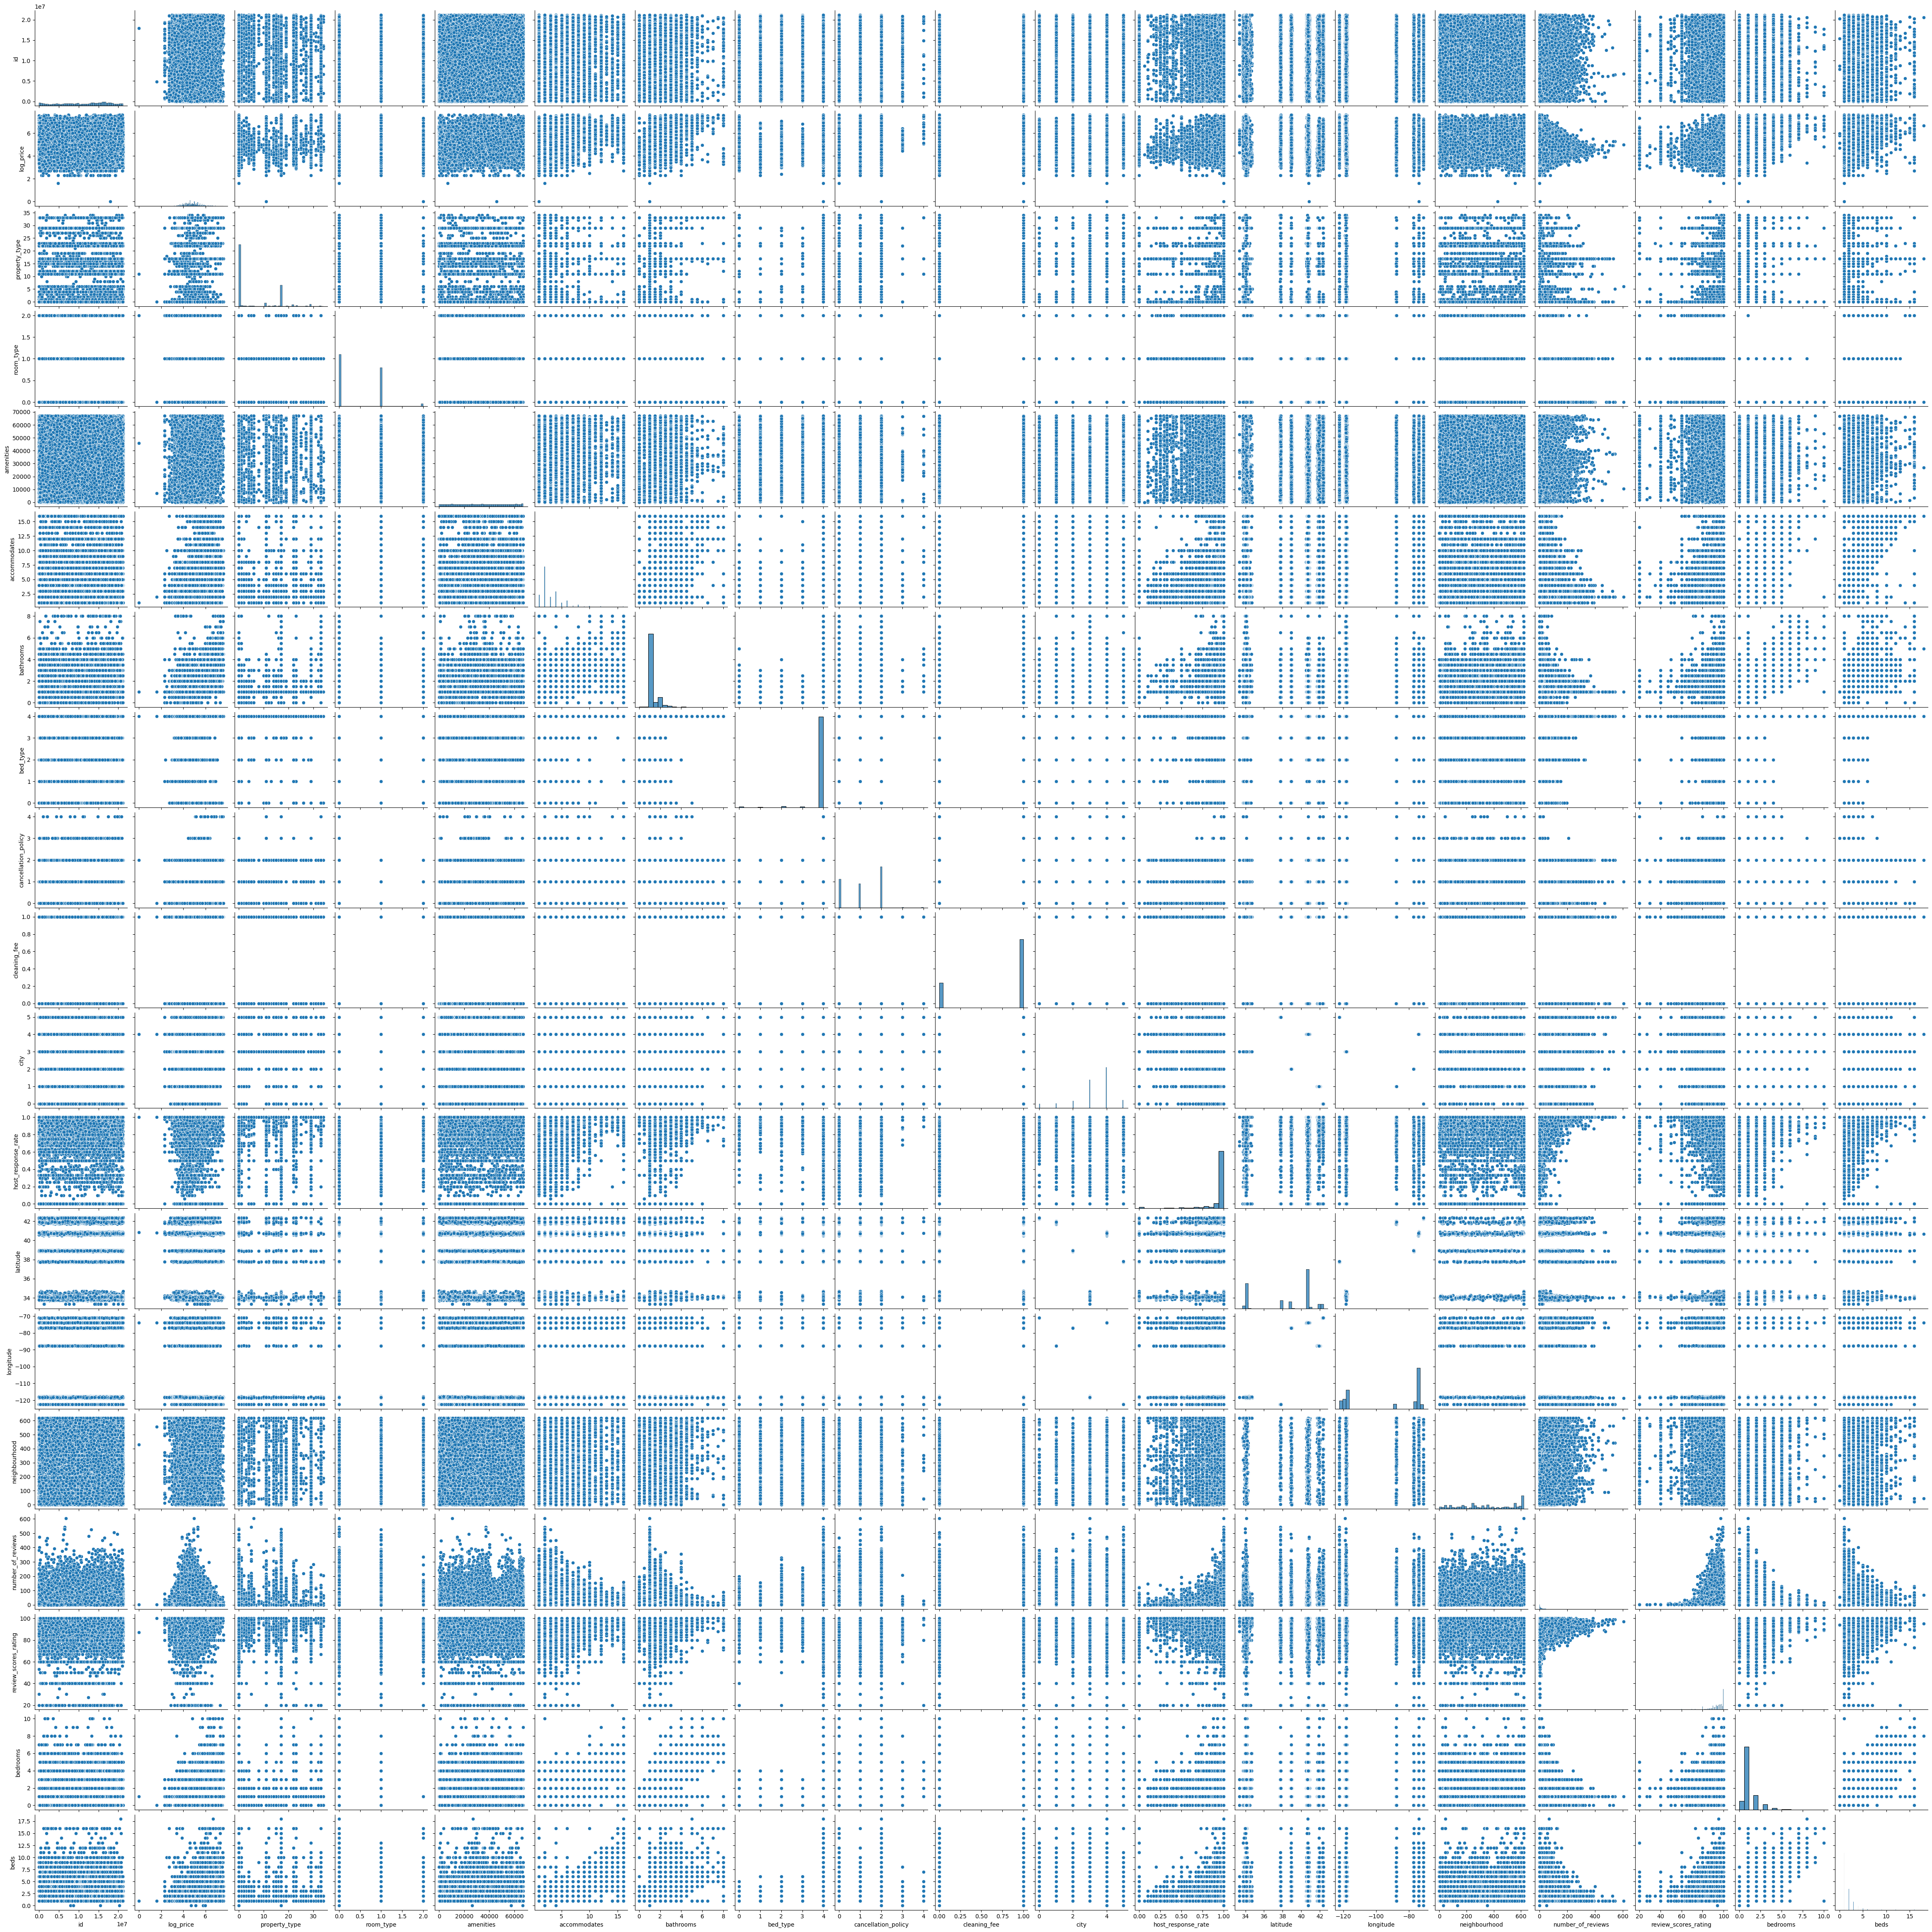

In [245]:
# pairplot to visualize the relationship between variables
sns.pairplot(df)
plt.show()

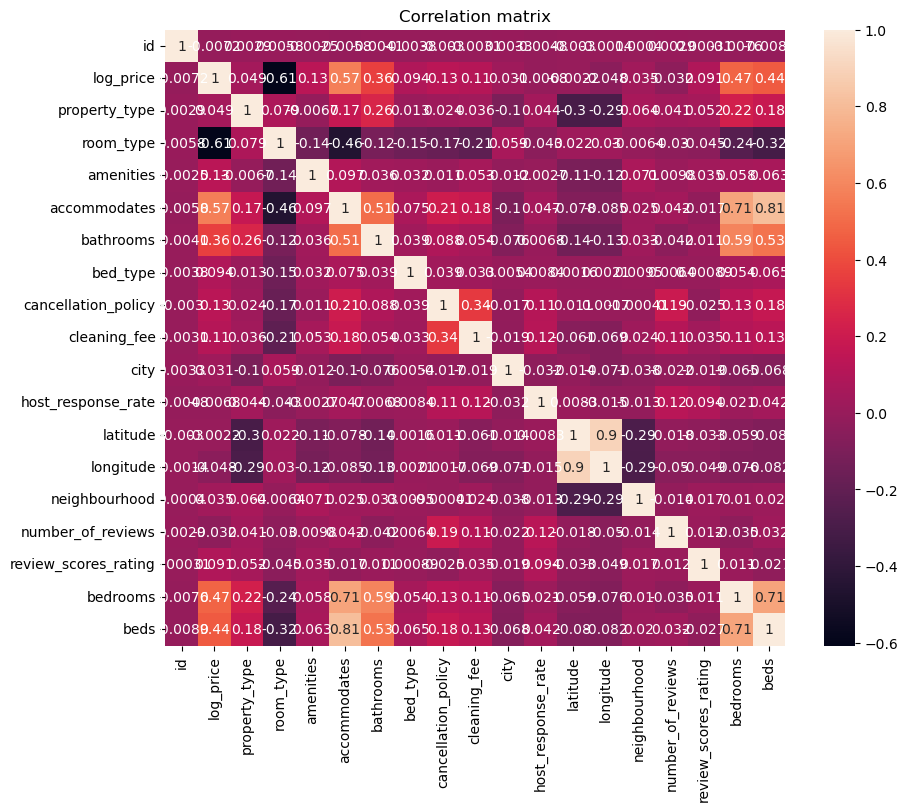

In [70]:
#correlation matrix
num_cols=list()
for column in df.columns:
    if df[column].dtype!=object:
        num_cols.append(column)
cor = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.title('Correlation matrix')
plt.show()

clearly price is directly dependent on parameters like no.of rooms,accommodates,no. of bathrooms and beds

In [13]:
#data preprocessing
#Encode categorical variables
label_encoders={}
for column in ['property_type','room_type','amenities','bed_type','cancellation_policy','cleaning_fee','city','neighbourhood']:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le

In [14]:
df['bathrooms']=df['bathrooms'].fillna(round(df['bathrooms'].median()))
df['bedrooms']=df['bedrooms'].fillna(round(df['bedrooms'].median()))
df['beds']=df['beds'].fillna(round(df['beds'].median()))

In [17]:
#features and target
x= df.drop(['id','name','amenities','cancellation_policy','number_of_reviews','description','first_review','host_has_profile_pic','review_scores_rating','instant_bookable','host_identity_verified','zipcode','host_response_rate','host_since','last_review','latitude','log_price','longitude','name','neighbourhood','thumbnail_url'],axis=1)

y=df['log_price']
x.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  74111 non-null  int32  
 1   room_type      74111 non-null  int32  
 2   accommodates   74111 non-null  int64  
 3   bathrooms      74111 non-null  float64
 4   bed_type       74111 non-null  int32  
 5   cleaning_fee   74111 non-null  int64  
 6   city           74111 non-null  int32  
 7   bedrooms       74111 non-null  float64
 8   beds           74111 non-null  float64
dtypes: float64(3), int32(4), int64(2)
memory usage: 4.0 MB


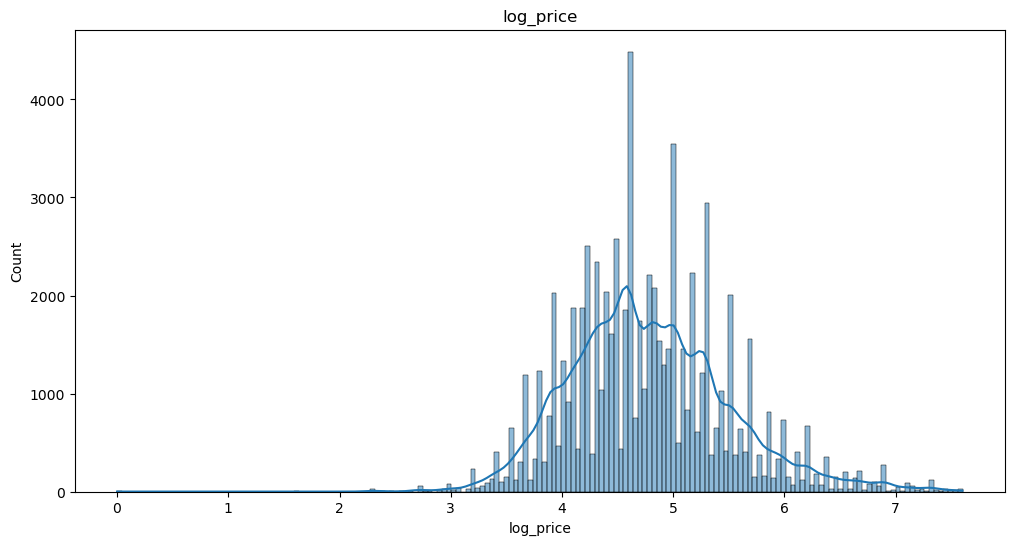

In [32]:
# Visualize the distribution of key features
plt.figure(figsize=(12,6))
sns.histplot(df['log_price'], kde=True)
plt.title('log_price')
plt.show()

<Axes: ylabel='log_price'>

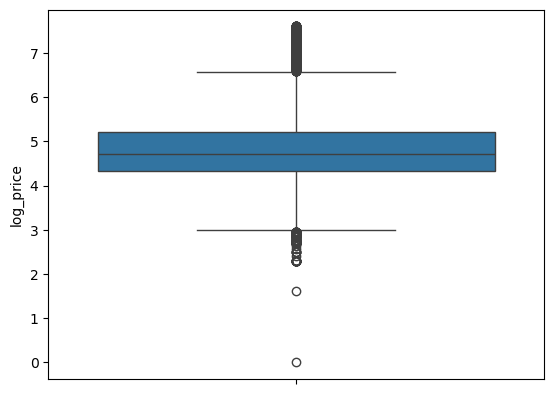

In [36]:
sns.boxplot(data=df['log_price'])

In [53]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#filling missing values
x['beds']=x['beds'].fillna(round(x['beds'].median()))

In [61]:
# Normalize numerical features
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [65]:
# 1. linear regression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [44]:
#Predictions
y_predict=linear_model.predict(x_test)
#Evaluate the model
print(f'mean squared error:{mean_squared_error(y_test,y_predict)}')
print(f'r^2 score:{r2_score(y_test,y_predict)}')
print(f'mean absolute error:{mean_absolute_error(y_test,y_predict)}')
print(f'root mean squared error:{mean_squared_error(y_test,y_predict)**(1/2)}')


mean squared error:0.24539195902442257
r^2 score:0.5223290090923765
mean absolute error:0.3752032628804514
root mean squared error:0.49537052700420375


In [ ]:
# 2.knn method
knn_param_grid={'n_neighbors':[1000,500],'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
para_grid_knn=GridSearchCV(KNeighborsRegressor(),knn_param_grid)
para_grid_knn.fit(x_train,y_train)
knn_best=para_grid_knn.best_params_
knn_best_acc=para_grid_knn.best_score_

In [293]:
#Print result
print('knn best parameters',knn_best)
print('knn best accuracy',knn_best_acc)

knn best parameters {'algorithm': 'brute', 'n_neighbors': 500, 'weights': 'distance'}
knn best accuracy 0.1787423088372912


In [ ]:
# 3.random forest
r_param_grid={'n_estimators':[150,200,800],'min_sample_split':[20,50]}
para_grid_r=GridSearchCV(KNeighborsRegressor(),knn_param_grid)
para_grid_r.fit(x_train,y_train)
r_best=para_grid_r.best_params_
r_best_acc=para_grid_r.best_score_
#Print result
print('Random forest best parameters',r_best)
print('Random forest best accuracy',r_best_acc)

In [ ]:
# 4.support vector machine
s_param_grid={'kernel':['rbf','sigmoid','C':[1,2,5]]}
para_grid_s=GridSearchCV(KNeighborsRegressor(),knn_param_grid)
para_grid_s.fit(x_train,y_train)
s_best=para_grid_s.best_params_
s_best_acc=para_grid_s.best_score_
#Print result
print('SVM best parameters',s_best)
print('SVM forest best accuracy',s_best_acc)


In [ ]:
 # to make predictions for new listings,enter the values 
property_type=input('enter property type')
room_type=input('enter room_type')
accommodates=input('enter accommodates')
bathrooms= input('enter no. of bathrooms')
bed_type=input('enter bed type') 
cleaning_fee=input('enter cleaning fee')  
city= input('enter city')
 bedrooms=input('enter no of bedrooms')
 beds=input('enter no. of beds')
input_=np.array([[property_type],[room_type],[accommodates],[bathrooms],[bed_type],[cleaning],[city],[bedrooms],[beds]])
preticted price= linearmodel.predict(input_)

clearly linear regression algorithm is giving the best results having good r^2 value and less mean square errors.

In [ ]:
video explanation
https://drive.google.com/file/d/1FAckNIC0KbU2mEXueN0zGq2OvWqW_O5x/view?usp=drivesdk